In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data=pd.read_excel(r"C:\Vaishnavi\Studies\Udemy\Project 1\Flight_Price_resources/Data_Train.xlsx")

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [13]:
data=train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
def change_into_Datetime(col):
    data[col]=pd.to_datetime(data[col])

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [21]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month
data['Journey_year']=data['Date_of_Journey'].dt.year

In [23]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-03 05:50:00,2024-12-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [24]:
def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head(3)

In [25]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [26]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-03 05:50:00,2024-12-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [27]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-03 05:50:00,2024-12-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [28]:
cols_to_drop=["Arrival_Time","Dep_Time"]
data.drop(cols_to_drop,axis=1,inplace=True)

In [29]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [30]:
data.shape

(10682, 16)

In [31]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"
    

<Axes: xlabel='Dep_Time_hour'>

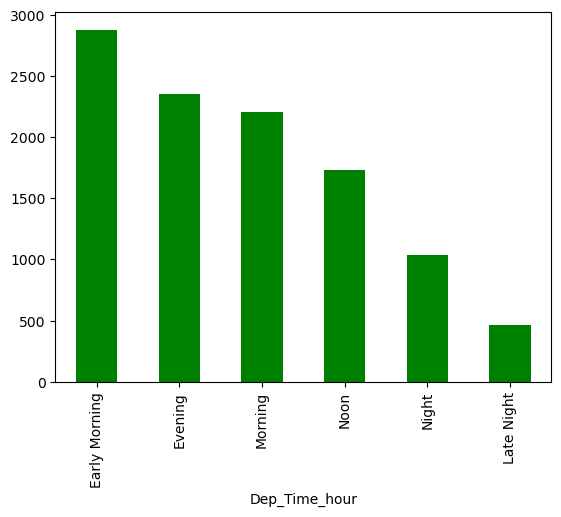

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="green")

In [33]:
!pip install plotly
!pip install chart_studio

In [34]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [35]:
!pip install cufflinks

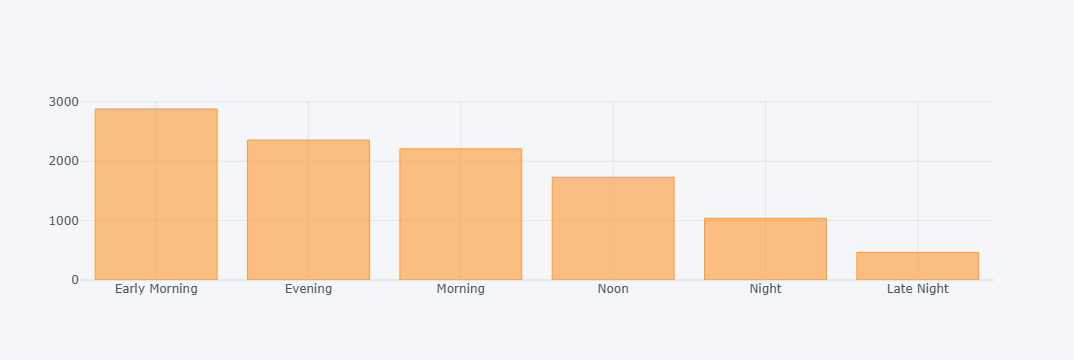

In [36]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [37]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+ ' '+'0m'
    else:
        return x

In [38]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [39]:
data['Duration']

0        2h 50m
1        7h 25m
2          None
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680      None
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
data['Duration'][0]

'2h 50m'

In [41]:
'2h 50m'.split(' ')

['2h', '50m']

In [42]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [43]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [44]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [45]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [46]:
data['Duration'].apply(lambda x:int('2h 50m'.split(' ')[0][0:-1]) )

0        2
1        2
2        2
3        2
4        2
        ..
10678    2
10679    2
10680    2
10681    2
10682    2
Name: Duration, Length: 10682, dtype: int64

In [47]:
data['Duration'].apply(lambda x:int('2h 50m'.split(' ')[1][0:-1]) )

0        50
1        50
2        50
3        50
4        50
         ..
10678    50
10679    50
10680    50
10681    50
10682    50
Name: Duration, Length: 10682, dtype: int64

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [49]:
data['Duration']

0        2h 50m
1        7h 25m
2          None
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680      None
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [50]:
eval('2*60')

120

In [51]:
data['Duration'] = data['Duration'].astype(str)


In [52]:
data['Duration_total_mins']=data['Duration'].str.replace('h',"*60").str.replace(' ',"+").str.replace('m',"*1").apply(eval)

In [53]:
data['Duration_total_mins']

0        170.0
1        445.0
2          NaN
3        325.0
4        285.0
         ...  
10678    150.0
10679    155.0
10680      NaN
10681    160.0
10682    500.0
Name: Duration_total_mins, Length: 10682, dtype: float64

In [54]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

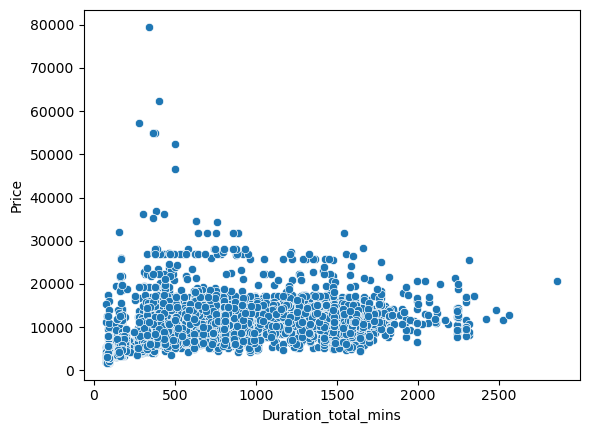

In [55]:
sns.scatterplot(x='Duration_total_mins',y="Price",data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

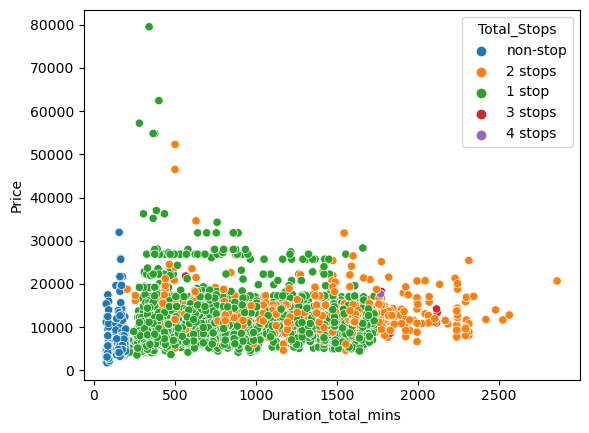

In [56]:
sns.scatterplot(x='Duration_total_mins',y="Price",hue="Total_Stops",data=data)

In [57]:
data['Airline']=="Jet Airways"

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [58]:
data[data['Airline']=="Jet Airways"].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

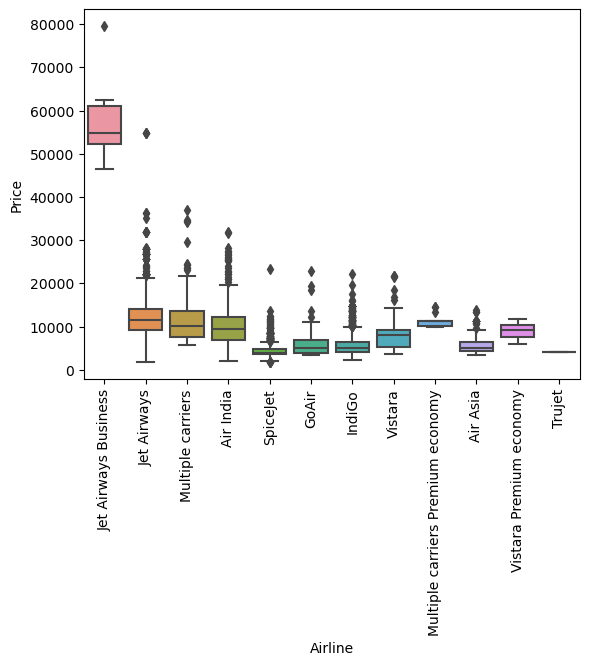

In [59]:
sns.boxplot(x="Airline",y="Price",data=data.sort_values("Price",ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [60]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [61]:
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [62]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [63]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [64]:
 data['Source'].apply(lambda x: 1 if x=='Bangalore' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [65]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category]=data['Source'].apply(lambda x: 1 if x=='sub_category' else 0)

In [66]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,1,10,170.0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,13,15,445.0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,None,2 stops,No info,13882,9,...,9,25,4,25,NaN,0,0,0,0,0


In [67]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [68]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,1,10,170.0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,13,15,445.0,0,0,0,0,0


In [69]:
data['Airline'].nunique()

12

In [70]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [71]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [72]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [73]:
dict_airlines={ key:index for index, key in enumerate(airlines,0)}

In [74]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [75]:
data['Airline'].map(dict_airlines)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,1,10,170.0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,13,15,445.0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,None,2 stops,No info,13882,9,...,9,25,4,25,NaN,0,0,0,0,0


In [77]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [78]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [79]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [80]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [81]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [82]:
dict_dest={ key:index for index, key in enumerate(dest,0)}

In [83]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
data['Destination']=data['Destination'].map(dict_dest)

In [85]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [86]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,1,10,170.0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,13,15,445.0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,None,2 stops,No info,13882,9,...,9,25,4,25,NaN,0,0,0,0,0


In [87]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [88]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [89]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [90]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [91]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,1,10,170.0,0,0,0,0,0


In [92]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [93]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [94]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,1,10,170.0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,13,15,445.0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,None,2,No info,13882,9,...,9,25,4,25,NaN,0,0,0,0,0
3,IndiGo,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,18,5,23,30,325.0,0,0,0,0,0


In [95]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'],axis=1, inplace=True)

In [96]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [97]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,0,0,0,0,0
1,Air India,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,0,0,0,0,0
2,Jet Airways,4,DEL → LKO → BOM → COK,None,2,13882,9,6,9,25,4,25,0,0,0,0,0
3,IndiGo,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30,0,0,0,0,0


In [98]:
data.drop(columns=['Route'],axis=1,inplace=True)

In [99]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2,2h 50m,0,3897,24,3,22,20,1,10,0,0,0,0,0
1,Air India,3,7h 25m,2,7662,1,5,5,50,13,15,0,0,0,0,0
2,Jet Airways,4,None,2,13882,9,6,9,25,4,25,0,0,0,0,0


In [100]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [101]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2,0,3897,24,3,22,20,1,10,0,0,0,0,0
1,Air India,3,2,7662,1,5,5,50,13,15,0,0,0,0,0
2,Jet Airways,4,2,13882,9,6,9,25,4,25,0,0,0,0,0


In [102]:
print(data.dtypes)  # Check the data types of all columns


Airline                object
Destination             int64
Total_Stops             int64
Price                   int64
Journey_day             int32
Journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object


In [103]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2,0,3897,24,3,22,20,1,10,0,0,0,0,0
1,Air India,3,2,7662,1,5,5,50,13,15,0,0,0,0,0
2,Jet Airways,4,2,13882,9,6,9,25,4,25,0,0,0,0,0


In [104]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)

    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

In [105]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2,0,3897,24,3,22,20,1,10,0,0,0,0,0
1,Air India,3,2,7662,1,5,5,50,13,15,0,0,0,0,0
2,Jet Airways,4,2,13882,9,6,9,25,4,25,0,0,0,0,0


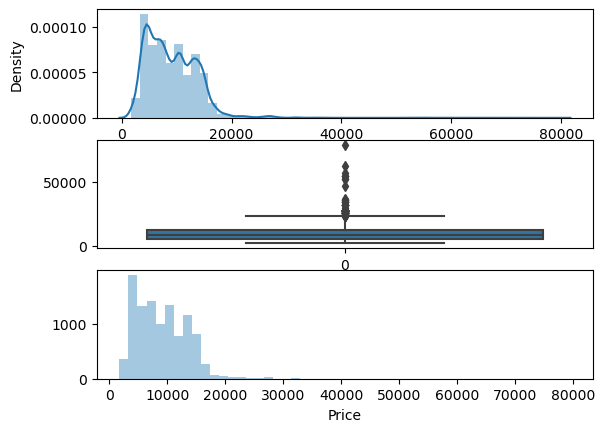

In [106]:
plot(data,'Price')

In [107]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)

iqr=q3-q1

maximum=q3+1.5*iqr
minimum=q3-1.5*iqr

In [108]:
print(maximum)

23017.0


In [109]:
print(minimum)

1729.0


In [110]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [111]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [112]:
np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

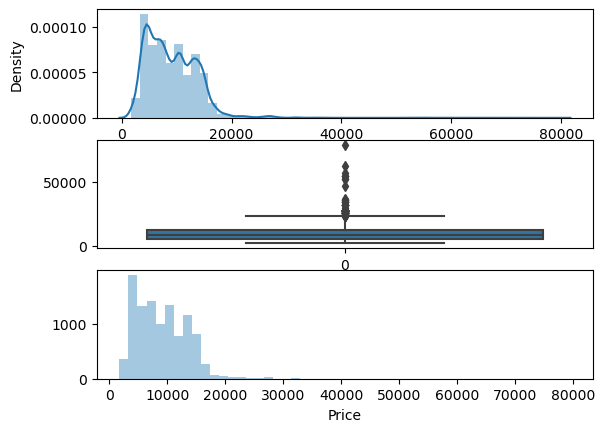

In [113]:
plot(data,'Price')

In [114]:
X=data.drop(['Price'],axis=1)

In [115]:
y=data['Price']

In [116]:
from sklearn.feature_selection import mutual_info_regression


In [117]:
print(X.dtypes)  # Check data types of features
print(y.dtype)   # Check data type of the target


Airline                object
Destination             int64
Total_Stops             int64
Journey_day             int32
Journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object
int64


In [118]:
print(X['Airline'].unique())  # Replace 'column_name' with the actual column


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Airline'] = le.fit_transform(X['Airline'])


In [120]:
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric


In [121]:
from sklearn.feature_selection import mutual_info_regression

imp = mutual_info_regression(X, y)
print(imp)


[0.90790746 1.0064544  0.79695897 0.22680115 0.6294353  0.34186058
 0.26835052 0.40436276 0.33768322 0.00278229 0.         0.0014122
 0.00294075 0.00404387]


In [122]:
imp_df=pd.DataFrame(imp,index=X.columns)

In [123]:
imp_df.columns=['importance']

In [124]:
imp_df

,importance
Airline,0.907907
Destination,1.006454
Total_Stops,0.796959
Journey_day,0.226801
Journey_month,0.629435
Dep_Time_hour,0.341861
Dep_Time_minute,0.268351
Arrival_Time_hour,0.404363
Arrival_Time_minute,0.337683
Source_Banglore,0.002782


In [125]:
imp_df.sort_values(by='importance',ascending=False)

,importance
Destination,1.006454
Airline,0.907907
Total_Stops,0.796959
Journey_month,0.629435
Arrival_Time_hour,0.404363
Dep_Time_hour,0.341861
Arrival_Time_minute,0.337683
Dep_Time_minute,0.268351
Journey_day,0.226801
Source_Mumbai,0.004044


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
ml_model=RandomForestRegressor()

In [130]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [131]:
y_pred=ml_model.predict(X_test)

In [132]:
y_pred

array([16716.45     ,  5727.52     ,  9045.81     , ...,  8491.55     ,
        8847.19     , 12266.8227381])

In [133]:
from sklearn import metrics

In [134]:
metrics.r2_score(y_test,y_pred)

0.831831489154501

In [135]:
import pickle

In [136]:
file=open(r'C:\Vaishnavi\Studies\Udemy\Project 1\Flight_Price_resources/rf_random.pkl','wb')

In [137]:
pickle.dump('ml_model',file)

In [138]:
model=open(r'C:\Vaishnavi\Studies\Udemy\Project 1\Flight_Price_resources/rf_random.pkl','rb')

In [181]:
#forest= pickle.load(model)

In [184]:
#print(type(forest))

In [185]:
#y_pred2 =forest.predict(X_test)

In [186]:
#metrics.r2_score(y_test,y_pred2)

In [142]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [143]:
mape(y_test,y_pred)

12.827856761617479

In [ ]:
from scikitlearn import metrics 

In [152]:
def predict(ml_model):
    model= ml_model.fit(X_train, y_train)
    print('Training Score:{}'.format(model.score(X_train,y_train)))
    y_predection=model.predict(X_test)
    print('Predection are :{}'.format(y_predection))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_predection)
    print('R2_score:{}'.format(r2_score))
    print('MAE:{}'.format(metrics.mean_absolute_error(y_test,y_predection)))
    print('MSE:{}'.format(metrics.mean_squared_error(y_test,y_predection)))
    print('RMSE:{}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predection))))
    print('MAPE:{}'.format(mape(y_test,y_predection)))
    sns.distplot(y_test-y_predection)

Training Score:0.9555527525224358
Predection are :[16715.33        5373.81        9009.62       ...  8361.72
  9176.65       12192.05616667]


R2_score:0.8296221821213356
MAE:1143.9472420129503
MSE:3420077.62964416
RMSE:1849.3451894235864
MAPE:12.884515332659028


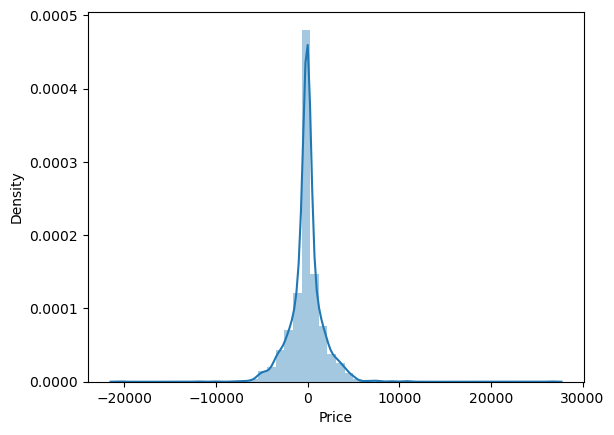

In [153]:
predict(RandomForestRegressor())

In [154]:
from sklearn.tree import DecisionTreeRegressor

Training Score:0.9738555696596053
Predection are :[16840.   4959.   8085.  ...  5746.  10141.  11652.5]


R2_score:0.7293319244023853
MAE:1304.368150879183
MSE:5433253.236459948
RMSE:2330.9339837198195
MAPE:14.482519606969646


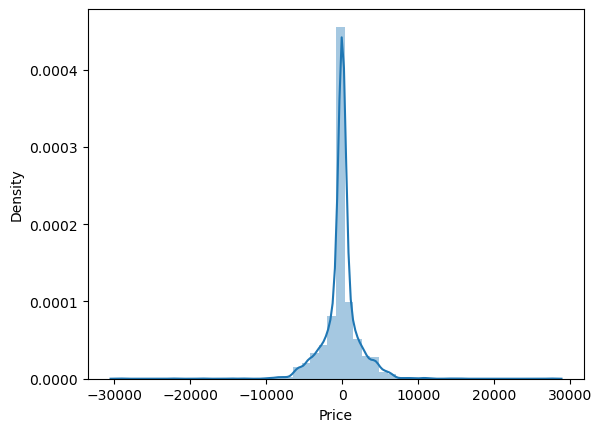

In [155]:
predict(DecisionTreeRegressor())

In [156]:
RandomForestRegressor()

RandomForestRegressor()

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
reg_rf=RandomForestRegressor()

In [167]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [170]:
import numpy as np

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [171]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [172]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [175]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [176]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [177]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [178]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='auto', min_samples_split=10,
                      n_estimators=760)

In [179]:
rf_random.best_score_

0.8020627589433454